In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import seaborn as sns

#Loading the dataset

In [0]:
d0= pd.read_csv('/content/drive/My Drive/MNIST/train.csv')
# save class labes into a variable l
l=d0['label']
d=d0.drop('label',axis=1)
print(d.shape)
print(l.shape)
del(d0)#free wasted memory

(42000, 784)
(42000,)


In [0]:
d.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#splitting into train test and cross validation set
from sklearn.model_selection import train_test_split
X_train, X_1, y_train, y_1 = train_test_split(d, l, test_size=0.3, random_state=0)
X_cv, X_test,y_cv,y_test= train_test_split(X_1,y_1 ,test_size=0.50, random_state=0)
print("shape of training data ", X_train.shape)
print("shape of cross validation data ", X_cv.shape)
print("shape of test data ", X_test.shape)
#freeing useless memory
del(d)
del(l)

shape of training data  (29400, 784)
shape of cross validation data  (6300, 784)
shape of test data  (6300, 784)


#Visualizaing a random Digit


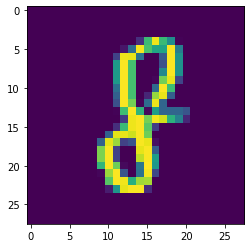

The above digit is 8


In [0]:
#display or plot a number
ind = np.random.randint(X_train.shape[0])# displaying a digit present at a random index from the  training set
grid_data = X_train.iloc[ind].values.reshape(28,28)
plt.imshow(grid_data)
plt.show()
print("The above digit is " + str(y_train.iloc[ind]))

#Naive Bayes Model

##Training the model


In [0]:
def NB(X_train, X_cv,y_train, y_cv):
 best_alpha= 0
 max_roc_auc= -1
 alphas=[10000,5000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
 roc_auc_train=[]
 roc_auc_cv=[]
 probs=[] # probability values for best alpha
 for i in alphas[-19:]:
    clf= MultinomialNB(alpha=i)
    clf.fit(X_train,y_train)
    pred_train= clf.predict_proba(X_train)
    pred_cv= clf.predict_proba(X_cv)
    auc_score_train= roc_auc_score(y_train,pred_train[:,1])
    auc_score_cv= roc_auc_score(y_cv,pred_cv[:,1])
    print(i,"------>",auc_score_cv)
    roc_auc_train.append( auc_score_train)
    roc_auc_cv.append( auc_score_cv)
    if(auc_score_cv>max_roc_auc):
      max_roc_auc= auc_score_cv
      best_alpha= i
      probs=pred_cv
 print(best_alpha, " is the best value of alpha with an roc_auc score of ", max_roc_auc)
 sns.set_style("darkgrid")
 plt.xscale("log")
 plt.plot(alphas,roc_auc_train,'r-', label="training data")
 plt.plot(alphas,roc_auc_cv,'g-', label="Cv data")
 plt.legend(loc='upper right')
 plt.title(r'Auc Score v/s $alpha$')
 plt.xlabel(r"$alpha$", fontsize= 12)
 plt.xlabel("auc value", fontsize= 12)
 plt.show()
 #for roc curve
 fpr, tpr, thresholds = metrics.roc_curve(y_cv,probs[:,1])
 plt.plot([0,1],[0,1],linestyle='--')# for a random(dumb) model
 plt.plot(fpr,tpr,marker='.')
 plt.title(r"ROC curve on cv data with best $aplha$ ")
 plt.xlabel("false positive rate", fontsize=12)
 plt.ylabel("True positive rate", fontsize=12)
 plt.show()
 return best_alpha

22016

In [0]:
y_train.shape

(29400,)

In [0]:
str(y_train[2])

'1'